# Price analysis of Stocks CSV

## Introduction
Carriage Services, Inc. is a provider of death care services and merchandise in the United States. The Company operates in two business segments: Funeral Home Operations and Cemetery Operations. The Funeral Homes segment provides funeral services (traditional burial and cremation) and sells related merchandise, such as caskets and urns. Its cemetery products and services include interment services, the rights to interment in cemetery sites and related cemetery merchandise, such as memorials and vaults. It serves suburban and rural markets. It provides funeral and cemetery services and products on both at-need (time of death) and preneed (planned prior to death) basis. It also maintains trusts in connection with funeral home and cemetery operations, including preneed funeral trusts, preneed cemetery merchandise and service trusts and cemetery perpetual care trusts.
Carriage Services, Inc. was founded in 1991 and is headquartered in Houston, Texas by Mr. Melvin C. Payne and Mr. Carl Benjamin Brink.	
As of December 31, 2019, the company operated 186 funeral homes in 29 states; and 31 cemeteries in 11 states. 

## Data Description and objectives
Nowadays a lot of companies selling their stocks on tradering platforms and this the price of stocks is changing each time, when stock exchange services are opening and closing.
Analysis will be based on historical data of stock price from 2010 to 2020.

Data:
 <ul>
 <li>Date</li>
 <li>Opeining price</li>
 <li>Highest price</li>
 <li>Lowest price</li>
 <li>Closing price</li>
 <li>Volume</li>
 <li>Adjusted Closing price</li>
 </ul>
Plan:
 <ul>
 <li>Take an offical dataset of price changes from Yahoo Finance source</li>
 <li>Organize Data Visualiszation by using Graphs, Histograms, tables</li>
 <li>Predict future stock price of Carriage Services Inc.</li>
 <li>Analyze taken results</li>
 <li>Make a conclusion</li>
 </ul>



In [3]:
import pandas as pd #to manipulate data
import numpy as np
import unicodecsv as csv
from scipy.stats import norm 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt #to plot a graph
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('CSV.csv') #reading CSV 
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-13,4.690000,4.800000,4.510000,4.760000,4.324210,48500
1,2010-09-20,4.840000,4.920000,4.710000,4.860000,4.415057,130900
2,2010-09-27,4.850000,5.100000,4.750000,5.040000,4.578575,113100
3,2010-10-04,5.100000,5.100000,4.940000,5.000000,4.542237,63800
4,2010-10-11,5.020000,5.250000,5.000000,5.210000,4.733010,149900
...,...,...,...,...,...,...,...
518,2020-08-17,23.020000,23.389999,22.180000,22.309999,22.309999,364200
519,2020-08-24,22.370001,23.160000,22.110001,22.370001,22.370001,302900
520,2020-08-31,22.290001,22.600000,21.850000,22.150000,22.150000,416000
521,2020-09-07,22.030001,22.360001,20.680000,21.190001,21.190001,526000


In [5]:
data.info()#datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       523 non-null    object 
 1   Open       523 non-null    float64
 2   High       523 non-null    float64
 3   Low        523 non-null    float64
 4   Close      523 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     523 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.7+ KB


In [6]:
data['Date'] = pd.to_datetime(data['Date']) #change the datatype of Date column for analysis

In [7]:
data.info()#datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       523 non-null    datetime64[ns]
 1   Open       523 non-null    float64       
 2   High       523 non-null    float64       
 3   Low        523 non-null    float64       
 4   Close      523 non-null    float64       
 5   Adj Close  523 non-null    float64       
 6   Volume     523 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 28.7 KB


(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330., 736695., 737060., 737425., 737791.]),
 <a list of 12 Text major ticklabel objects>)

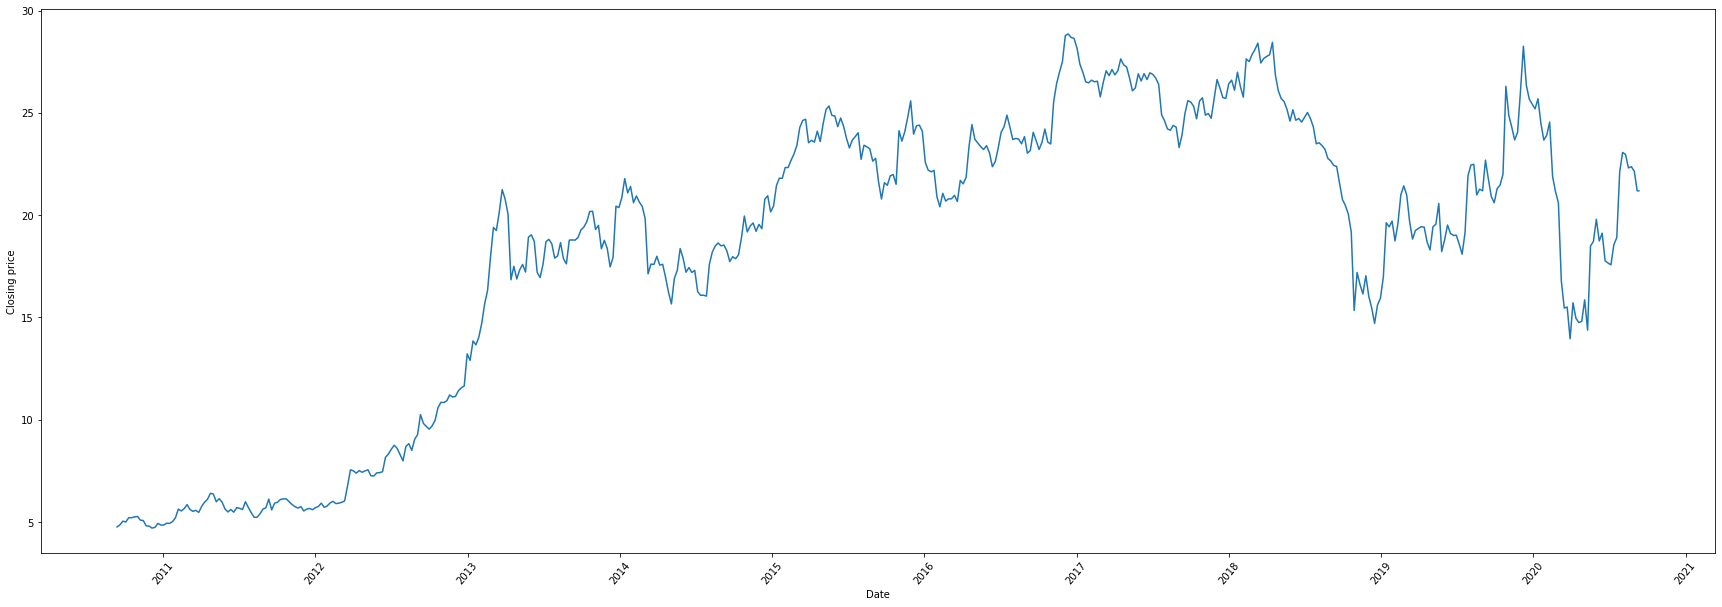

In [8]:
plt.figure(figsize=(30,10)) #plotting a graph of change of closing price for dates
plt.plot('Date','Close',data=data)
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.xticks(rotation=50)

Here we can see that in comparison to 2010, the stock price of CSV has been grewed up, but not at its pick value for given historical data

(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330., 736695., 737060., 737425., 737791.]),
 <a list of 12 Text major ticklabel objects>)

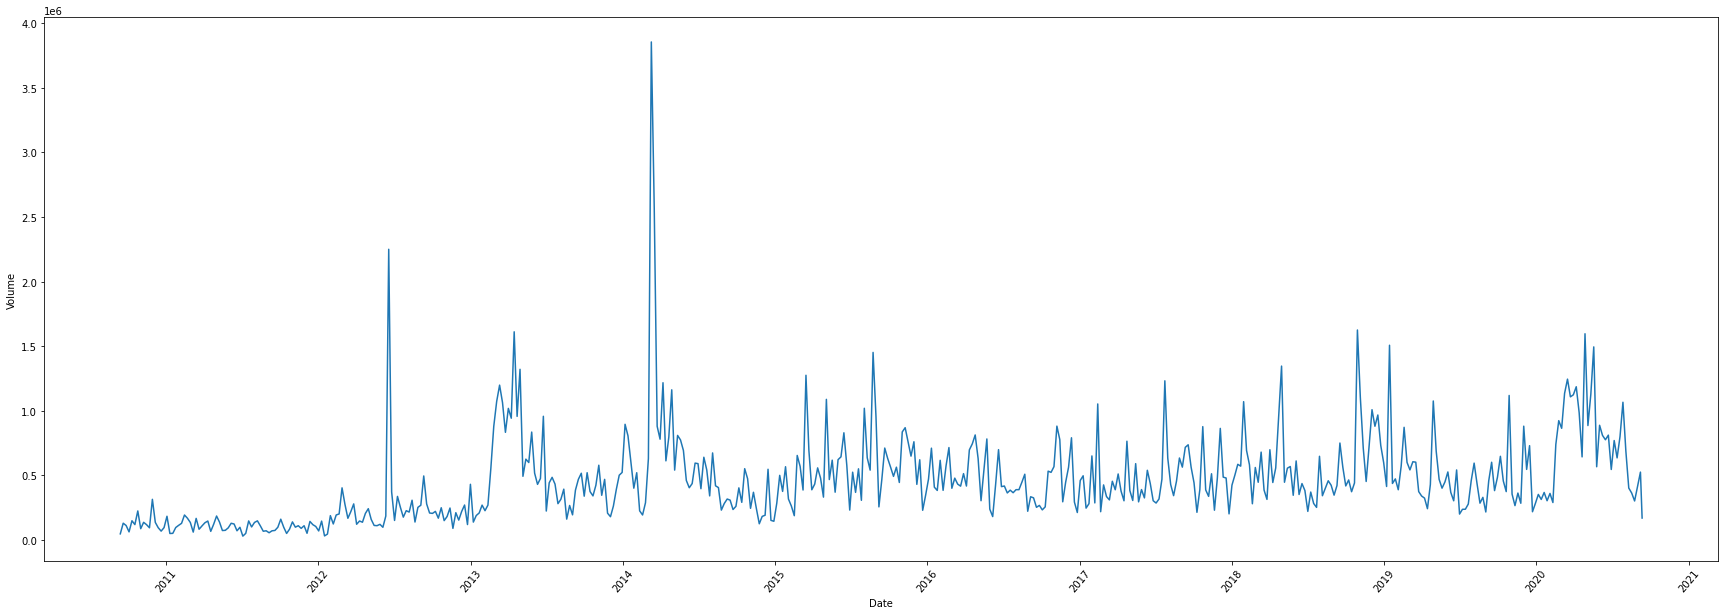

In [9]:
plt.figure(figsize=(30,10))
plt.plot('Date','Volume',data=data)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=50)

There are shown a volume of sold stocks per particular date/period of time and in contrast with 2010 it is on the same level, that can be object of stability of their stocks, because price is also changing.

In [10]:
data['Shift'] = data['Close'].shift(1) #New column with values of previous days closing price
data

,Date,Open,High,Low,Close,Adj Close,Volume,Shift
0,2010-09-13,4.690000,4.800000,4.510000,4.760000,4.324210,48500,NaN
1,2010-09-20,4.840000,4.920000,4.710000,4.860000,4.415057,130900,4.760000
2,2010-09-27,4.850000,5.100000,4.750000,5.040000,4.578575,113100,4.860000
3,2010-10-04,5.100000,5.100000,4.940000,5.000000,4.542237,63800,5.040000
4,2010-10-11,5.020000,5.250000,5.000000,5.210000,4.733010,149900,5.000000
...,...,...,...,...,...,...,...,...
518,2020-08-17,23.020000,23.389999,22.180000,22.309999,22.309999,364200,22.969999
519,2020-08-24,22.370001,23.160000,22.110001,22.370001,22.370001,302900,22.309999
520,2020-08-31,22.290001,22.600000,21.850000,22.150000,22.150000,416000,22.370001
521,2020-09-07,22.030001,22.360001,20.680000,21.190001,21.190001,526000,22.150000


In [11]:
data['Price Change'] = (data['Shift']/data['Close']) -1 #calculate actual price after one day
data

,Date,Open,High,Low,Close,Adj Close,Volume,Shift,Price Change
0,2010-09-13,4.690000,4.800000,4.510000,4.760000,4.324210,48500,NaN,NaN
1,2010-09-20,4.840000,4.920000,4.710000,4.860000,4.415057,130900,4.760000,-0.020576
2,2010-09-27,4.850000,5.100000,4.750000,5.040000,4.578575,113100,4.860000,-0.035714
3,2010-10-04,5.100000,5.100000,4.940000,5.000000,4.542237,63800,5.040000,0.008000
4,2010-10-11,5.020000,5.250000,5.000000,5.210000,4.733010,149900,5.000000,-0.040307
...,...,...,...,...,...,...,...,...,...
518,2020-08-17,23.020000,23.389999,22.180000,22.309999,22.309999,364200,22.969999,0.029583
519,2020-08-24,22.370001,23.160000,22.110001,22.370001,22.370001,302900,22.309999,-0.002682
520,2020-08-31,22.290001,22.600000,21.850000,22.150000,22.150000,416000,22.370001,0.009932
521,2020-09-07,22.030001,22.360001,20.680000,21.190001,21.190001,526000,22.150000,0.045304


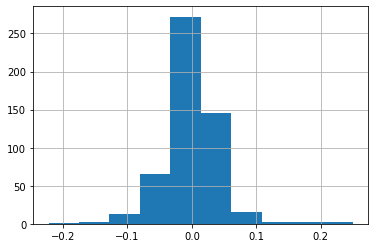

In [12]:
data['Price Change'].hist()

In [13]:
data.describe() #describe statistic information for all columns

,Open,High,Low,Close,Adj Close,Volume,Shift,Price Change
count,523.000000,523.000000,523.000000,523.000000,523.000000,5.230000e+02,522.000000,522.000000
mean,18.289943,18.843040,17.760574,18.316769,17.482889,4.616389e+05,18.311264,-0.001937
std,7.148285,7.274502,7.010027,7.127994,6.939626,3.506336e+05,7.133719,0.042906
min,4.690000,4.800000,4.500000,4.700000,4.269703,3.090000e+04,4.700000,-0.222282
25%,14.740000,15.885000,13.965000,14.885000,14.650291,2.293000e+05,14.847500,-0.021428
50%,19.830000,20.620001,19.030001,19.959999,19.126127,3.977000e+05,19.894999,-0.001564
75%,23.850000,24.524999,23.389999,23.875000,22.812565,5.889500e+05,23.892500,0.018910
max,29.000000,29.110001,28.459999,28.860001,27.926414,3.853500e+06,28.860001,0.249674


In [14]:
mean = data['Price Change'].mean() #average number
std = data['Price Change'].std()  #standard deviation
print('Mean =',mean)
print('Standard deviation =',std)

Mean = -0.0019370957847780694
Standard deviation = 0.04290608623513266


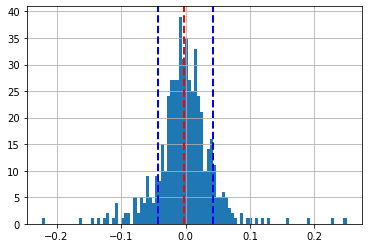

In [15]:
data['Price Change'].hist(bins=100)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
plt.axvline(std,color='blue',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='blue',linestyle='dashed',linewidth=2)

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000., 4000000., 4500000.]),
 <a list of 11 Text major ticklabel objects>)

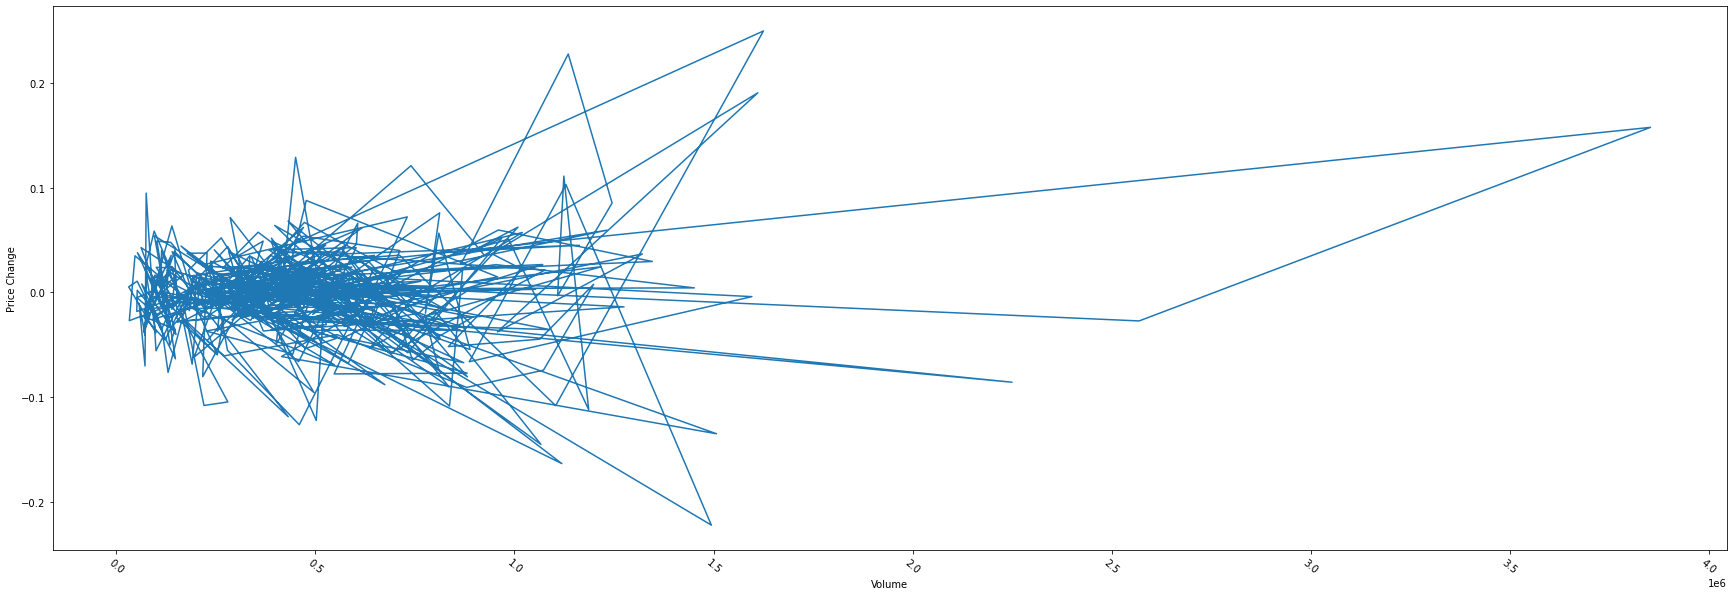

In [16]:
plt.figure(figsize=(30,10))
plt.plot('Volume','Price Change',data=data)
plt.xlabel('Volume')
plt.ylabel('Price Change')
plt.xticks(rotation=5000)

In [17]:
check = data.notnull()   #Just to check for null values
check

,Date,Open,High,Low,Close,Adj Close,Volume,Shift,Price Change
0,True,True,True,True,True,True,True,False,False
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
518,True,True,True,True,True,True,True,True,True
519,True,True,True,True,True,True,True,True,True
520,True,True,True,True,True,True,True,True,True
521,True,True,True,True,True,True,True,True,True


In [18]:
data.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,Shift,Price Change
1,2010-09-20,4.840000,4.920000,4.710000,4.860000,4.415057,130900,4.760000,-0.020576
2,2010-09-27,4.850000,5.100000,4.750000,5.040000,4.578575,113100,4.860000,-0.035714
3,2010-10-04,5.100000,5.100000,4.940000,5.000000,4.542237,63800,5.040000,0.008000
4,2010-10-11,5.020000,5.250000,5.000000,5.210000,4.733010,149900,5.000000,-0.040307
5,2010-10-18,5.090000,5.250000,4.900000,5.210000,4.733010,120100,5.210000,0.000000
...,...,...,...,...,...,...,...,...,...
518,2020-08-17,23.020000,23.389999,22.180000,22.309999,22.309999,364200,22.969999,0.029583
519,2020-08-24,22.370001,23.160000,22.110001,22.370001,22.370001,302900,22.309999,-0.002682
520,2020-08-31,22.290001,22.600000,21.850000,22.150000,22.150000,416000,22.370001,0.009932
521,2020-09-07,22.030001,22.360001,20.680000,21.190001,21.190001,526000,22.150000,0.045304


In [19]:
duplicate = data.duplicated()
duplicate

0      False
1      False
2      False
3      False
4      False
       ...  
518    False
519    False
520    False
521    False
522    False
Length: 523, dtype: bool

In [20]:
print('Date with lowest opening price:',data[['Date']].min(),data.loc[data['Date'].idxmax()].Close)

print('Date with highest closing price:',data['Date'].max(),data.loc[data['Date'].idxmax()].Close)

Date with lowest opening price: Date   2010-09-13
dtype: datetime64[ns] 21.190001000000002
Date with highest closing price: 2020-09-11 00:00:00 21.190001000000002


Sorry, it was my work created for 2 hours, because my main laptop was broken. I just spilled a coffee on it and internal components were impossible to recovery and I did it on PC on job place.

# Data analysis ana visualization

## 1.Plot the Daily Closing Price and Volume of a Stock.  

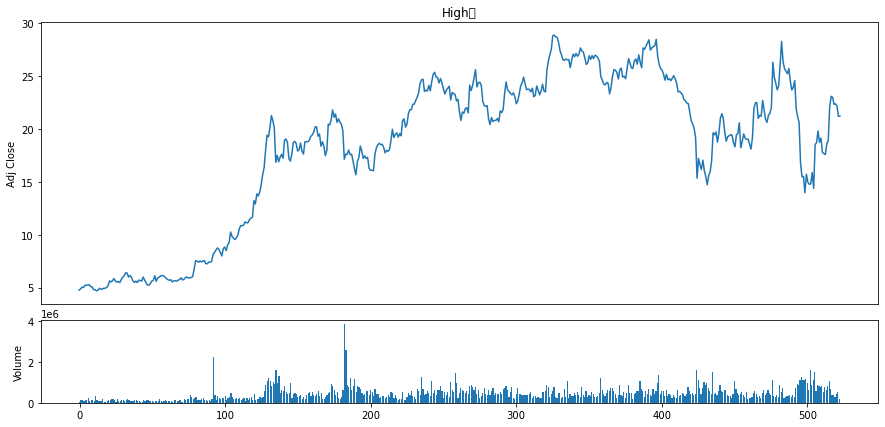

In [25]:
plt.figure(figsize=(15,7))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(data.index, data['Close']) 
bottom.bar(data.index, data['Volume']) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('High	')
top.set_ylabel('Adj Close')
bottom.set_ylabel('Volume');

According to this graph, we can see the change of adjective closing price of CSV stocks. There we can see rational tendency of increasing volume of stocks and adjective closing price. 
From the graph we can identify, that lowest closing price was $5, when highest price is $28. In the table representation, latest price equal to roundly $22.


Let's consider histograms of all positions, contained in dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205E9392970>,
      dtype=object)

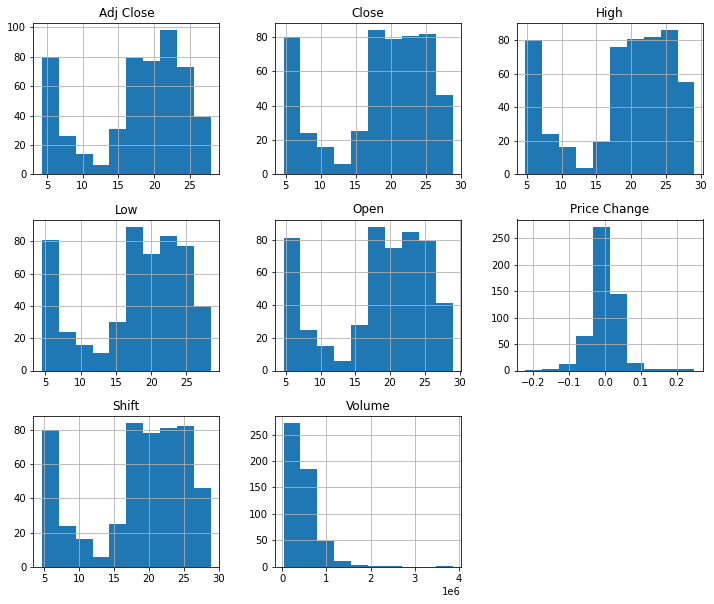

In [26]:
data.hist(figsize=(12,10))

On the histograms above, we can see 5 same charts of Lowest Price, Opening Price, Highest Price, Closing Price and Adjective price. Almost it is not a mistake, because this tendencies have low shift and they coming to one average value.

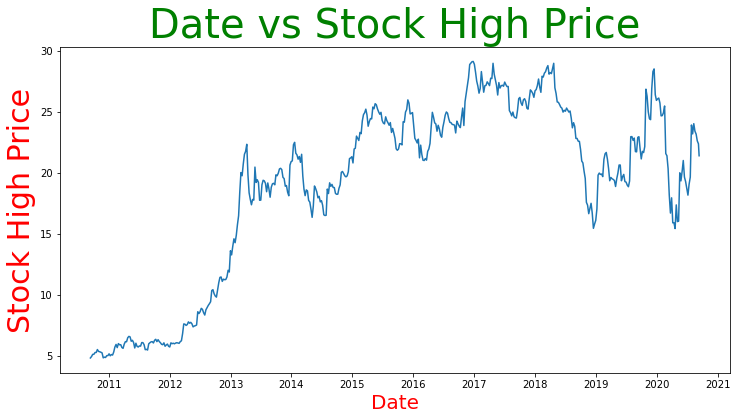

In [27]:
plt.figure(figsize=(12,6))
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(data['Date'],data['High'])
plt.title("Date vs Stock High Price",fontsize=40,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("Stock High Price",fontsize=30,color='r')
plt.show()

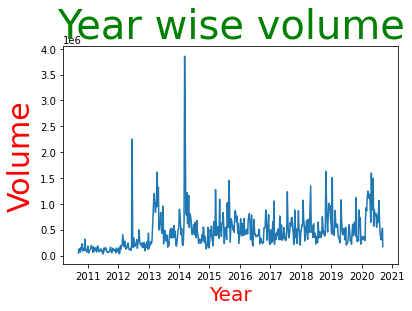

In [28]:
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(data['Date'],data['Volume'])
plt.title("Year wise volume",fontsize=40,color='g')
plt.xlabel("Year",fontsize=20,color='r')
plt.ylabel("Volume",fontsize=30,color='r')
plt.show()

The dataset consists of 10 year data with volume of available stocks, where we can see that peack of volume was mentioned in 2014th year. Financial assets that have traded are already increased in comparison to 2011.

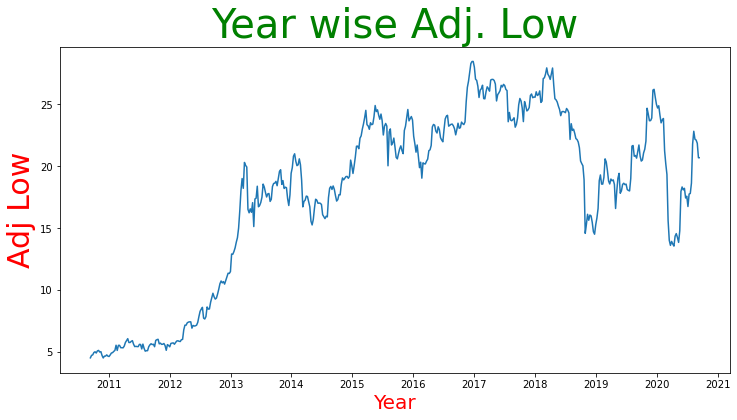

In [32]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'],data['Low'])
plt.title("Year wise Adj. Low",fontsize=40,color='g')
plt.xlabel("Year",fontsize=20,color='r')
plt.ylabel("Adj Low",fontsize=30,color='r')
plt.show()


The graph above illustrates the change of lowest price per different period of time. Actually, lowest price and adjusted closing price may be considered as different price, because low price is not fixed value during stock exchange market is open. There is possible to identify that current price was reached in first quarter of 2013. 

## Conclusion
In conclusion, there is possible to understand that Carriage Services Inc has been increased in price for 5 times, but it is not maximal growth for all 10 year period. Actually, all parametrs have been increased proportionately, that could provide an impression about company as steadily growing corporation. Here we should include few rules of economics, like with increasing trading volume, we will have decreasing in closing price. 